In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utils import get_seasonality_trend_overview, plot_period_mean
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
df_transactions = pd.read_csv('../originalni_datasetovi/transactions.csv').sort_values(['store_nbr', 'date'])
df_train = pd.read_csv('../originalni_datasetovi/train.csv')

In [3]:
df_transactions.head()

,date,store_nbr,transactions
1,2013-01-02,1,2111
47,2013-01-03,1,1833
93,2013-01-04,1,1863
139,2013-01-05,1,1509
185,2013-01-06,1,520


In [4]:
df_transactions['date'] = pd.to_datetime(df_transactions.date)
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83488 entries, 1 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.5 MB


Text(0.5, 1.0, 'Distribution : Transactions')

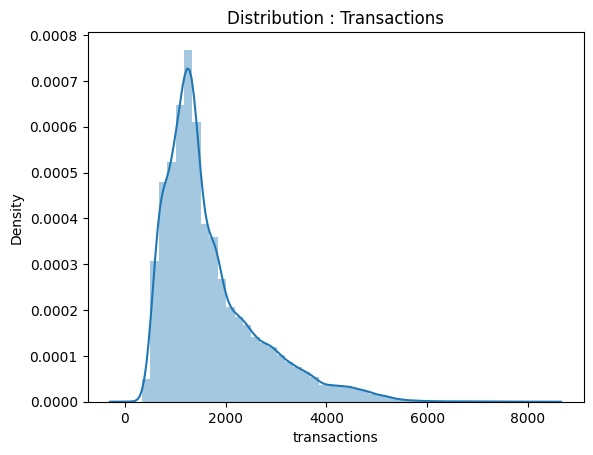

In [5]:
sns.distplot(df_transactions['transactions']);
plt.title('Distribution : Transactions')

Text(0, 0.5, 'Transactions')

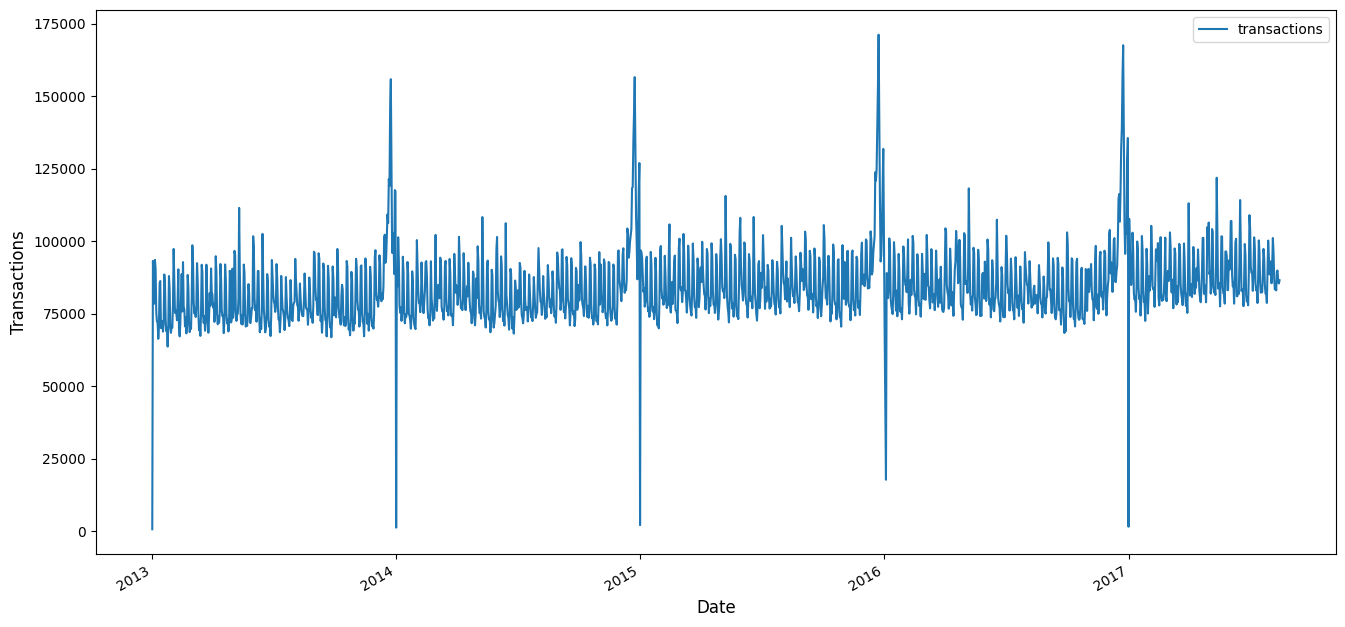

In [6]:
ax = df_transactions.groupby(['date'])[['transactions']].sum().plot(figsize = (16, 8))
ax.set_xlabel('Date', fontsize = 'large')
ax.set_ylabel('Transactions', fontsize = 'large')

Spearman Correlation between Total Sales and Transactions: 0.8175


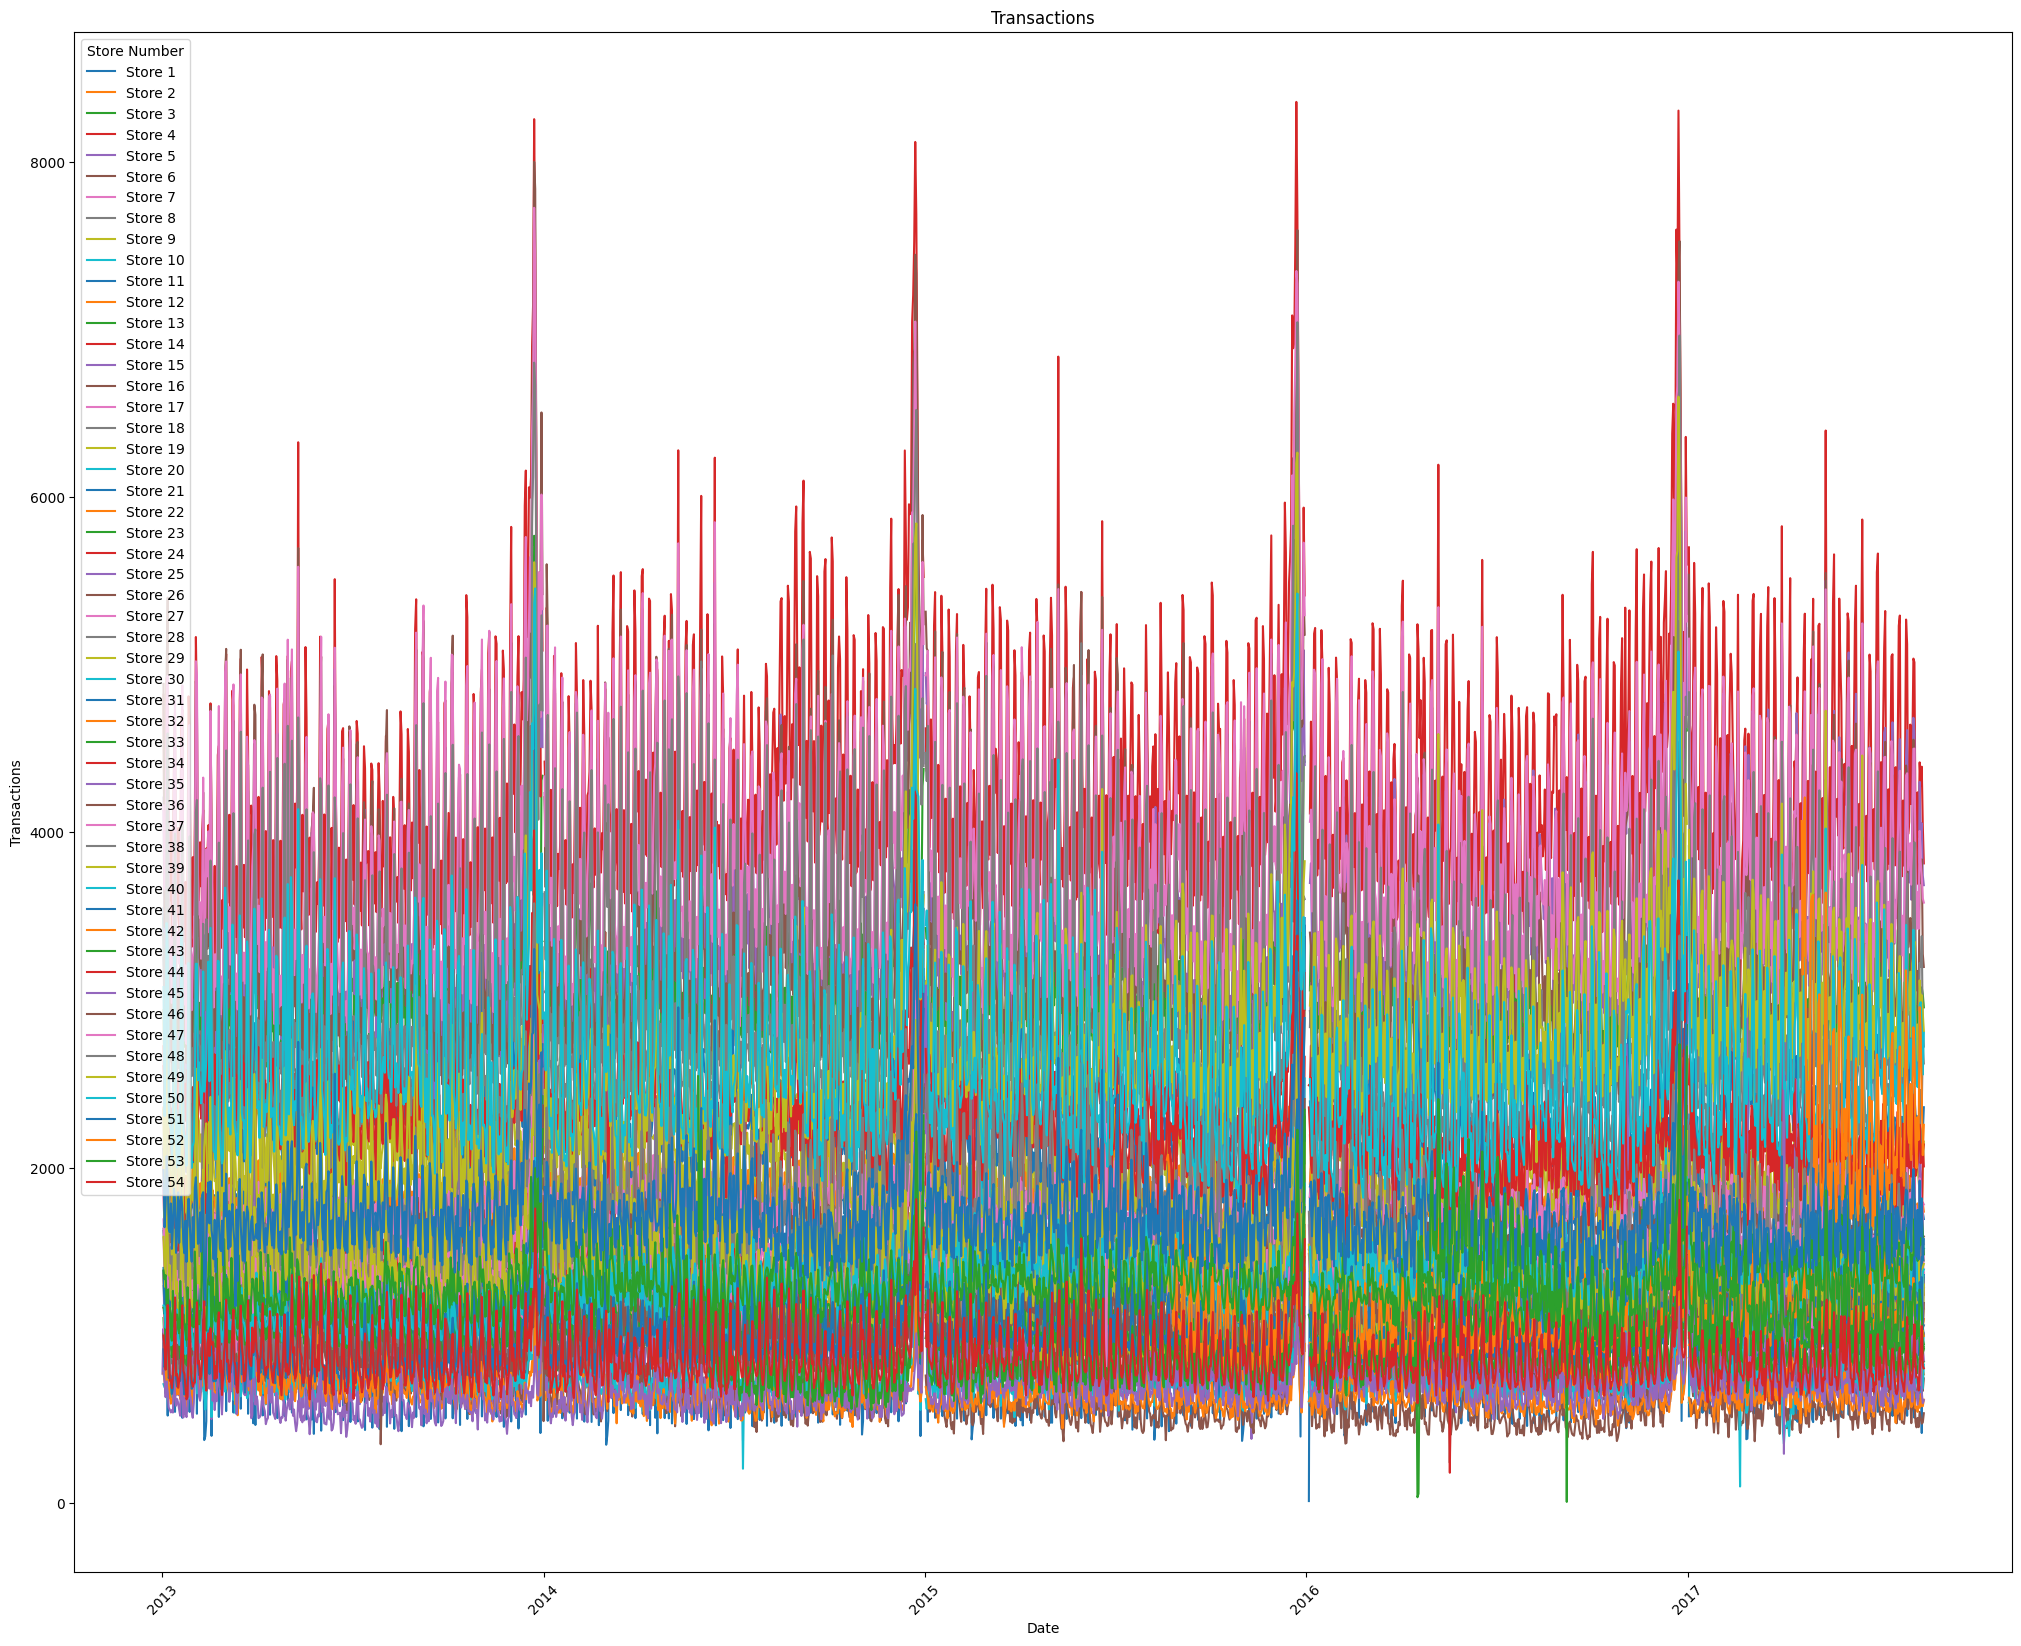

In [7]:
df_train['date'] = pd.to_datetime(df_train.date)

# merge train data and transactions data to check transaction/sales correlation
temp = pd.merge(df_train.groupby(['date', 'store_nbr']).sales.sum().reset_index(), df_transactions, how = 'left')
print('Spearman Correlation between Total Sales and Transactions: {:,.4f}'.format(temp.corr('spearman').sales.loc['transactions']))

transactions_sorted = temp.sort_values(['store_nbr', 'date'])

# Create a figure and an axis
fig, ax = plt.subplots(figsize=(25, 20))

# Plot each store's transactions
for store_nbr, data in transactions_sorted.groupby('store_nbr'):
    ax.plot(data['date'], data['transactions'], label=f'Store {store_nbr}')

# Set the title and labels
ax.set_title('Transactions')
ax.set_xlabel('Date')
ax.set_ylabel('Transactions')
ax.legend(title='Store Number')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

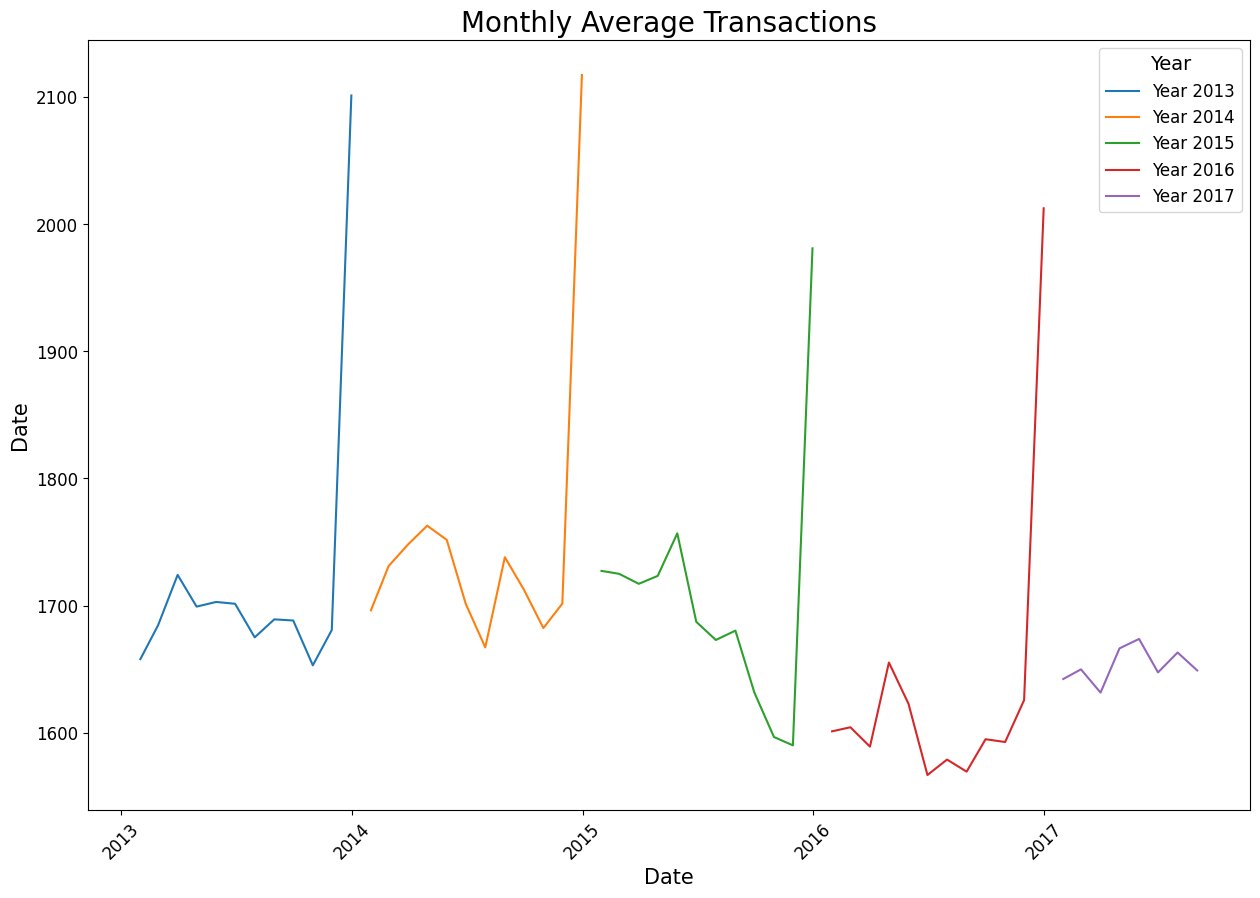

In [9]:
plot_period_mean(df_transactions, 'transactions', period='M')

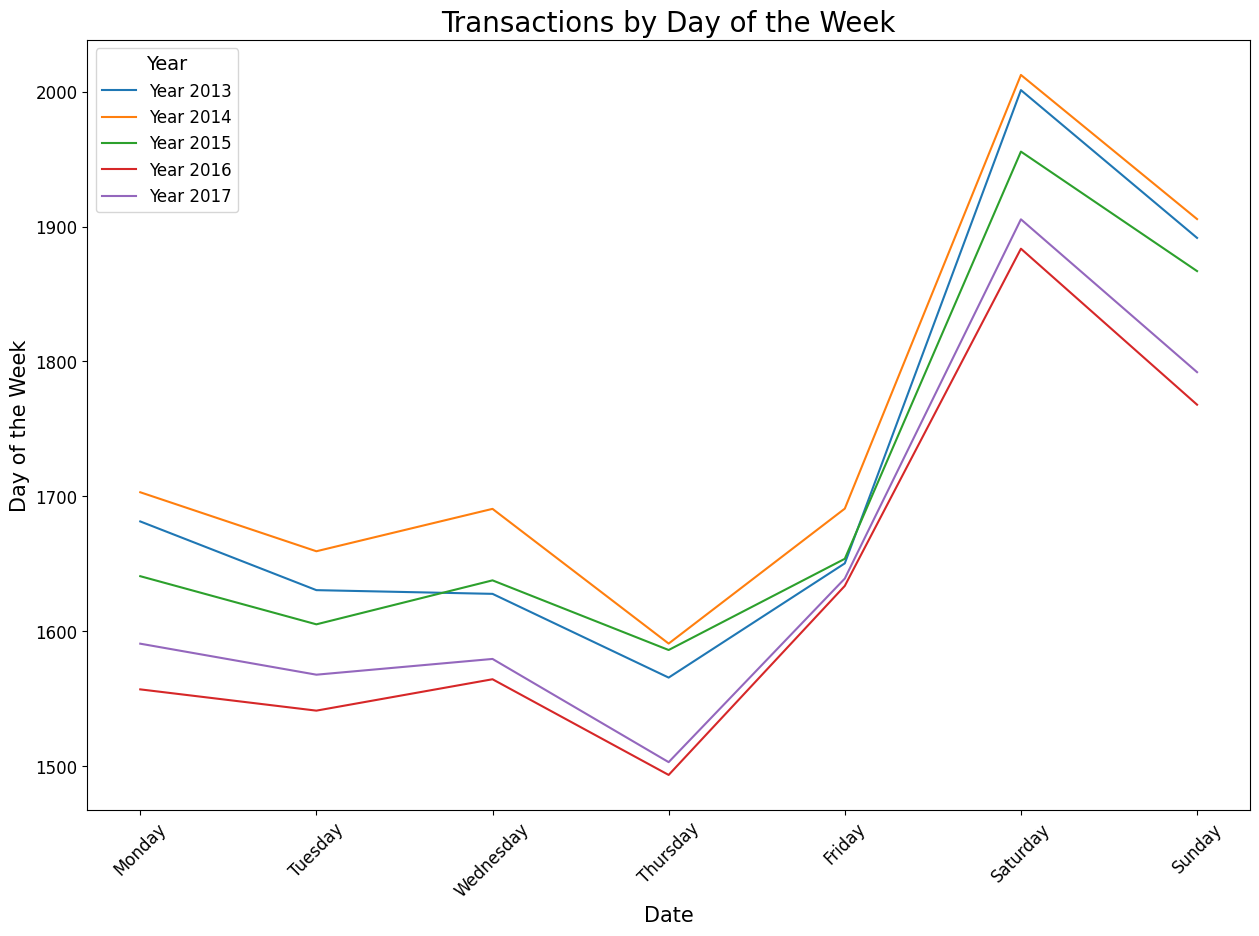

In [10]:
plot_period_mean(df_transactions, 'transactions', period='DW')

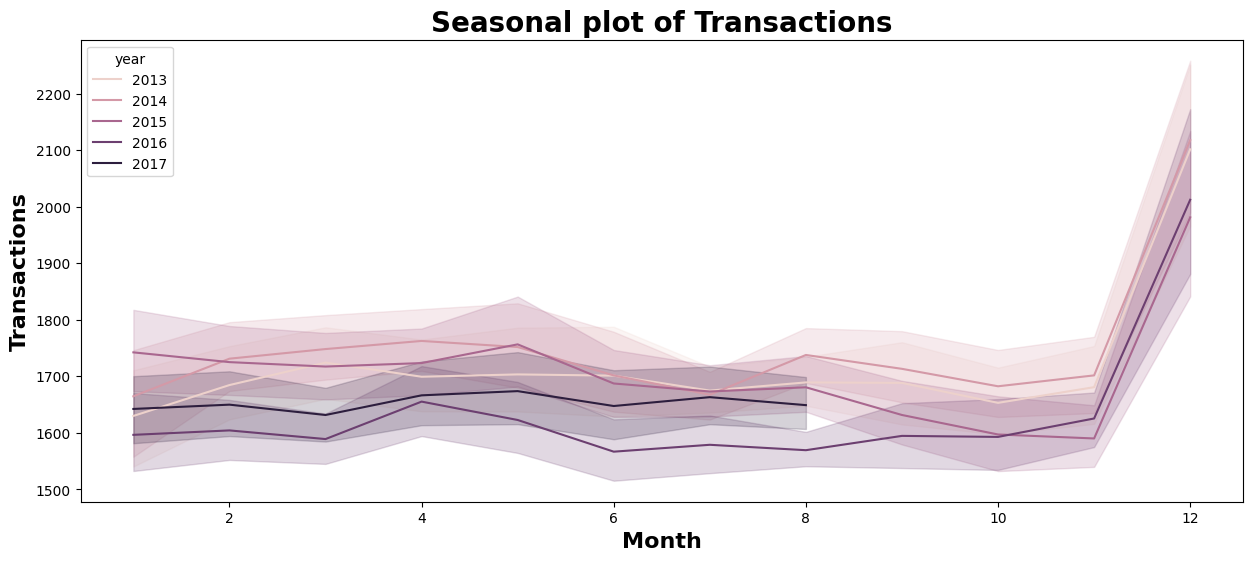

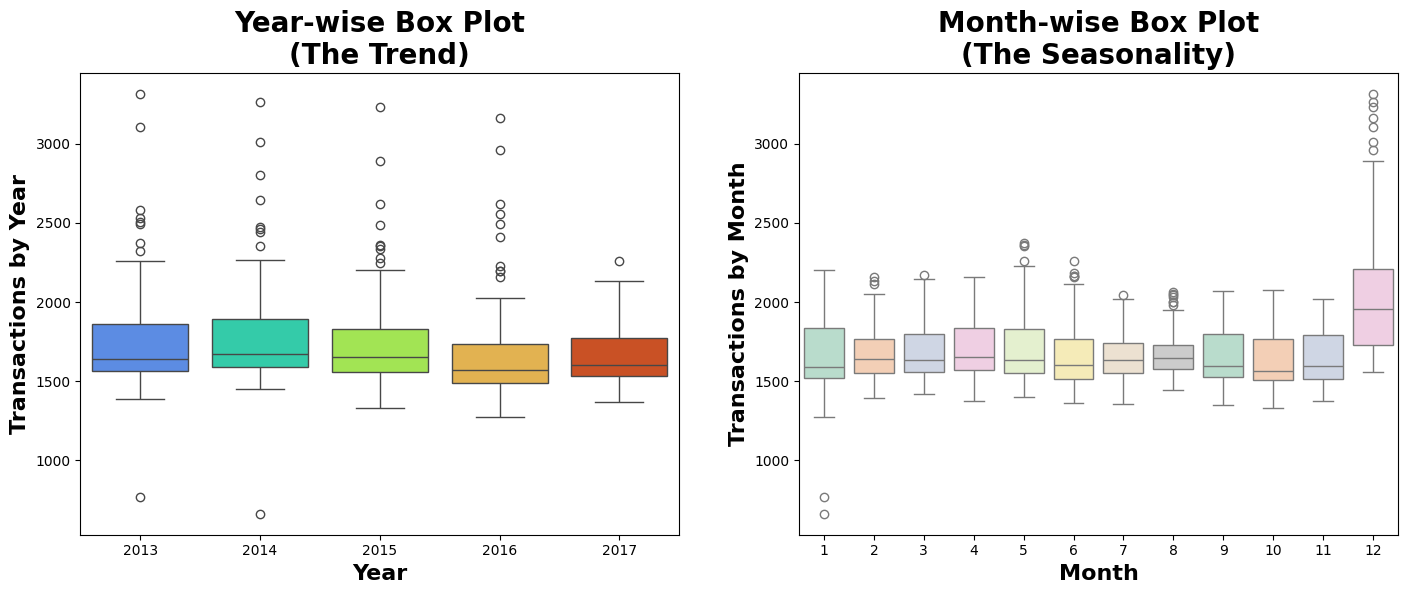

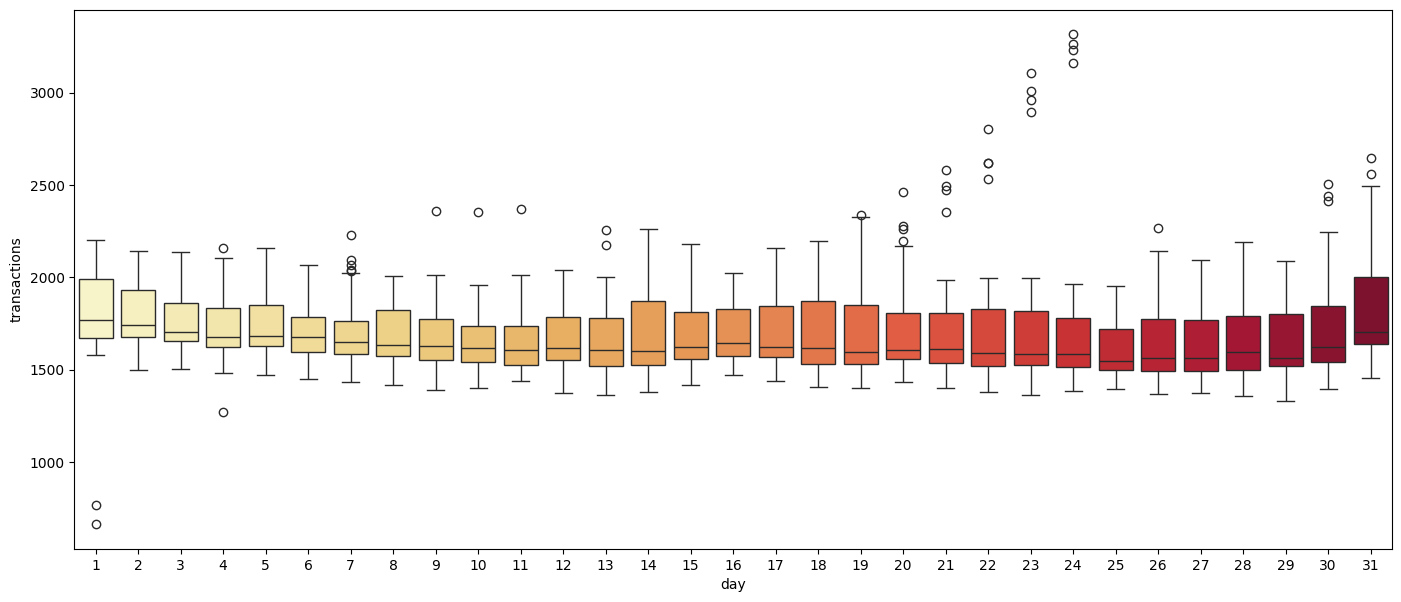

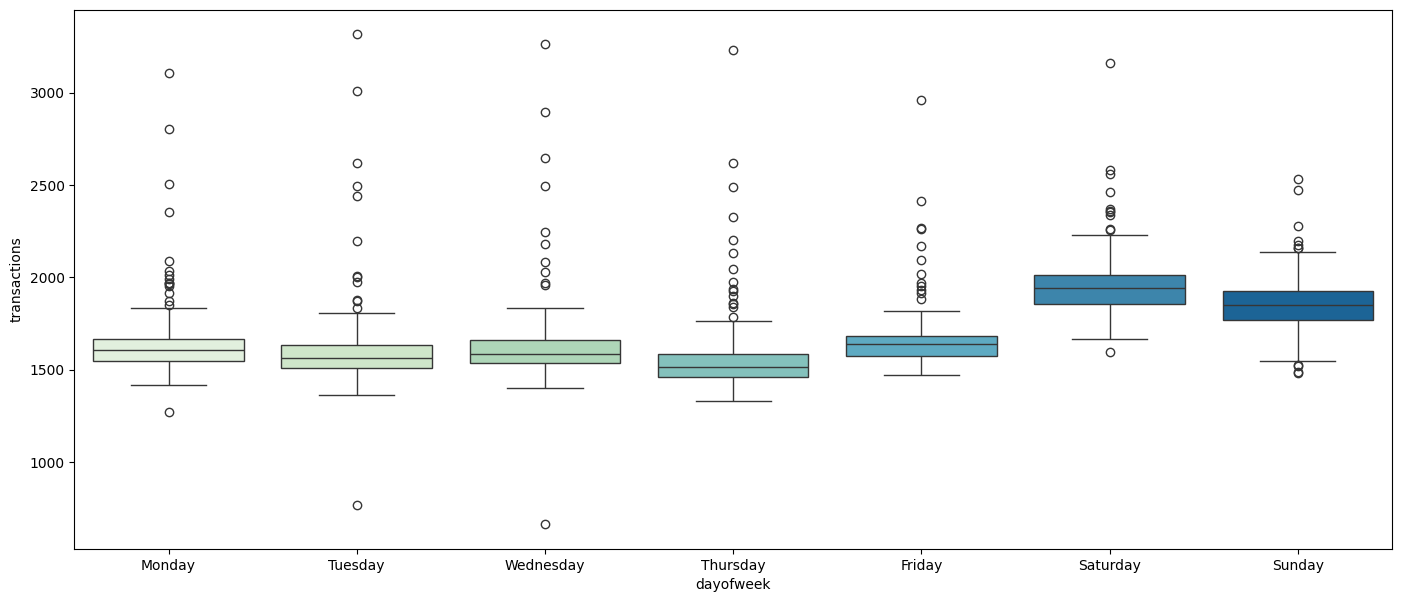

In [11]:
get_seasonality_trend_overview(df_transactions, "transactions", "Transactions")